# Performance of Hamilton and Russell
How is Mercedes newest driver doing alongside a world champion?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

In [2]:
%matplotlib inline

In [3]:
cf.go_offline() #allows to use cufflinks offline

In [4]:
race_results_df = pd.read_csv('data/compiled-data/race-results.csv')
race_results_df.head()

,Unnamed: 0,POS,Driver,Car,Laps,Time/Retired,PTS,Race
0,359,1,Charles Leclerc,Ferrari,57,37:33.6,26,BAHRAIN
1,358,2,Carlos Sainz,Ferrari,57,+5.598s,18,BAHRAIN
2,357,3,Lewis Hamilton,Mercedes,57,+9.675s,15,BAHRAIN
3,356,4,George Russell,Mercedes,57,+11.211s,12,BAHRAIN
4,355,5,Kevin Magnussen,Haas Ferrari,57,+14.754s,10,BAHRAIN


In [5]:
# Some results are in capitals for the car column
race_results_df['Car'] = race_results_df['Car'].str.replace('MERCEDES', 'Mercedes')

In [6]:
fastest_lap_df = pd.read_csv('data/compiled-data/fastest-laps.csv')
fastest_lap_df.head()

,Unnamed: 0,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
0,348,16,Charles Leclerc,FERRARI,BAHRAIN,94.6,206.018
1,347,1,Max Verstappen,RED BULL RACING RBPT,BAHRAIN,95.4,204.140
2,346,55,Carlos Sainz,FERRARI,BAHRAIN,95.7,203.501
3,345,11,Sergio Perez,RED BULL RACING RBPT,BAHRAIN,96.1,202.762
4,344,44,Lewis Hamilton,MERCEDES,BAHRAIN,96.2,202.469


In [12]:
mercedes_fastest_lap_df = fastest_lap_df.loc[fastest_lap_df['CAR'] == 'MERCEDES']
mercedes_fastest_lap_df.head()

,Unnamed: 0,NO,DRIVER,CAR,RACE,FL,AVG_SPEED
4,344,44,Lewis Hamilton,MERCEDES,BAHRAIN,96.2,202.469
5,343,63,George Russell,MERCEDES,BAHRAIN,96.3,202.313
26,322,63,George Russell,MERCEDES,SAUDI ARABIA,92.8,239.454
27,321,44,Lewis Hamilton,MERCEDES,SAUDI ARABIA,93.0,239.001
41,307,63,George Russell,MERCEDES,AUSTRALIA,81.5,233.152


In [8]:
# let's filter out the results

mercedes_df = race_results_df.loc[race_results_df['Car'] == 'Mercedes']
mercedes_df.head()

,Unnamed: 0,POS,Driver,Car,Laps,Time/Retired,PTS,Race
2,357,3,Lewis Hamilton,Mercedes,57,+9.675s,15,BAHRAIN
3,356,4,George Russell,Mercedes,57,+11.211s,12,BAHRAIN
24,335,5,George Russell,Mercedes,50,+32.732s,10,SAUDI ARABIA
29,330,10,Lewis Hamilton,Mercedes,50,+73.948s,1,SAUDI ARABIA
42,317,3,George Russell,Mercedes,58,+25.593s,15,AUSTRALIA


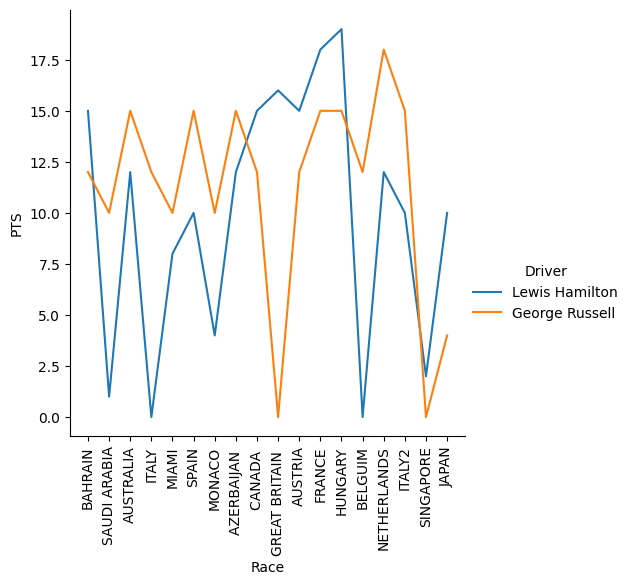

In [9]:
# create plot
plot = sns.relplot(data=mercedes_df, kind='line', x='Race', y='PTS', hue='Driver', markers=True)
plot.set_xticklabels(rotation=90)

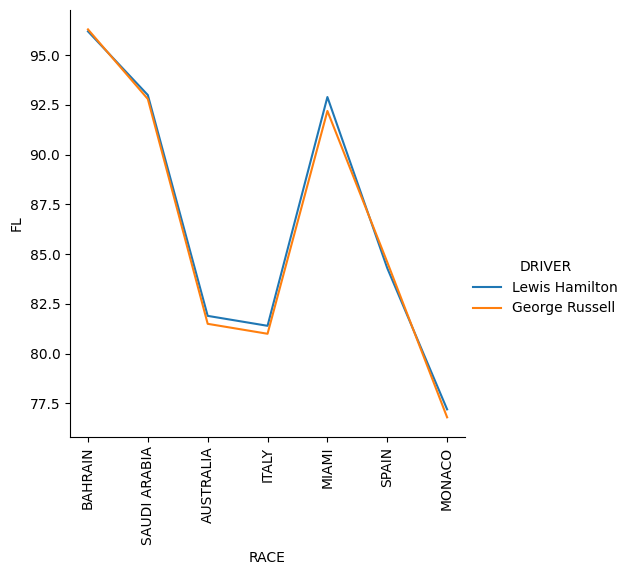

In [10]:
# create plot
plot = sns.relplot(data=mercedes_fastest_lap_df, kind='line', x='RACE', y='FL', hue='DRIVER', markers=True)
plot.set_xticklabels(rotation=90)

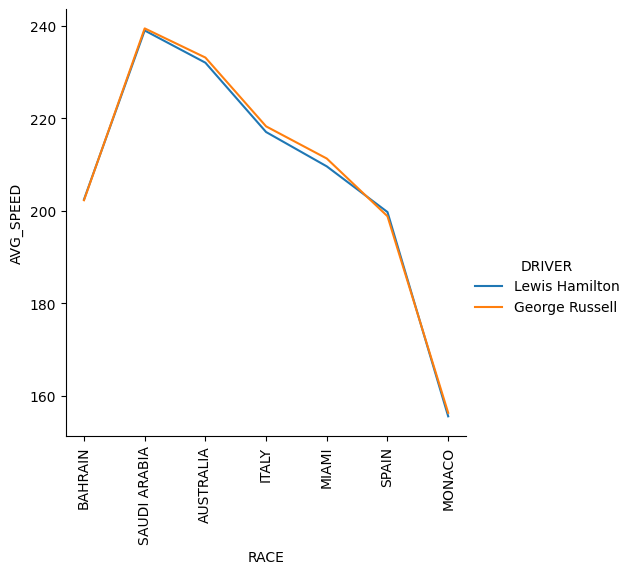

In [11]:
# create plot
plot = sns.relplot(data=mercedes_fastest_lap_df, kind='line', x='RACE', y='AVG_SPEED', hue='DRIVER', markers=True)
plot.set_xticklabels(rotation=90)

In [50]:
mercedes_df.loc[mercedes_df['Driver'] == 'George Russell']['PTS'].mean()

12.0

In [51]:
mercedes_df.loc[mercedes_df['Driver'] == 'Lewis Hamilton']['PTS'].mean()

7.142857142857143

In [57]:
mercedes_df.loc[mercedes_df['Driver'] == 'George Russell']['PTS'].sum()

84

In [58]:
mercedes_df.loc[mercedes_df['Driver'] == 'Lewis Hamilton']['PTS'].sum()

50

In [56]:
mercedes_df.loc[mercedes_df['Driver'] == 'George Russell']['POS'].describe()

count     7
unique    3
top       5
freq      3
Name: POS, dtype: object

In [55]:
mercedes_df.loc[mercedes_df['Driver'] == 'Lewis Hamilton']['POS'].describe()

count     7
unique    7
top       3
freq      1
Name: POS, dtype: object